# Creacion de una red neuronal con Python y Tensorflow
Es solo una demostracion del uso de redes neuronales con Python y Tensofrlow

En el aprendizaje automatico contamos con las entradas, es decir con los valores iniciales, con los resultado finales, pero NO CONOCEMOS COMO LLEGAR DE UN PUNTO A OTRO. Dicho de otra manera es como tener numeros (valores iniciales) y los correspondientes resultados a esos numeros (valores finales) y no sepamos cuales fueron las operacion que sucedieron en el medio para que se llegue del punto A al punto B.

Se busca encontrar un modelo que pueda encontrar por si solo el algoritmo que tome las entradas y de los resultados finales.

En programacion regular lo que hariamos es definir tal vez una funcion que tome los valores de entrada y me de los valores finales, pero en aprendizaje automatico solo le daremos al sistema los valores de entrada y los valores finales para que el decida cual es el algoritmo que mejor se ajusta.

## Capas y neuronas en redes neuronales
las redes se definen a traves de capas y de neuronas.
Cada capa puede tener una o varias neuronas. Debe tener si o si una capa de entrada (que es donde tendremos los valores iniciales) y una capa de salida (donde estaran los resultados finales), entre medio nosotros podemos poner cuantas capas y neuronas queramos (estas capas intermedias seran las "capas ocultas"), pero esto afectara no solo al modelo sino tambien a la velocidad de procesamiento.
las neuronas de cada capa se conectan a las siguientes con conexiones.estas conexiones entre neuronas tiene un "peso" asignado que representa la importancia de la conexion entre las neuronas.
Cada neurona (salvo las de entrada) tienen un "sesgo" es una valor numerico agregado en principio al azar.

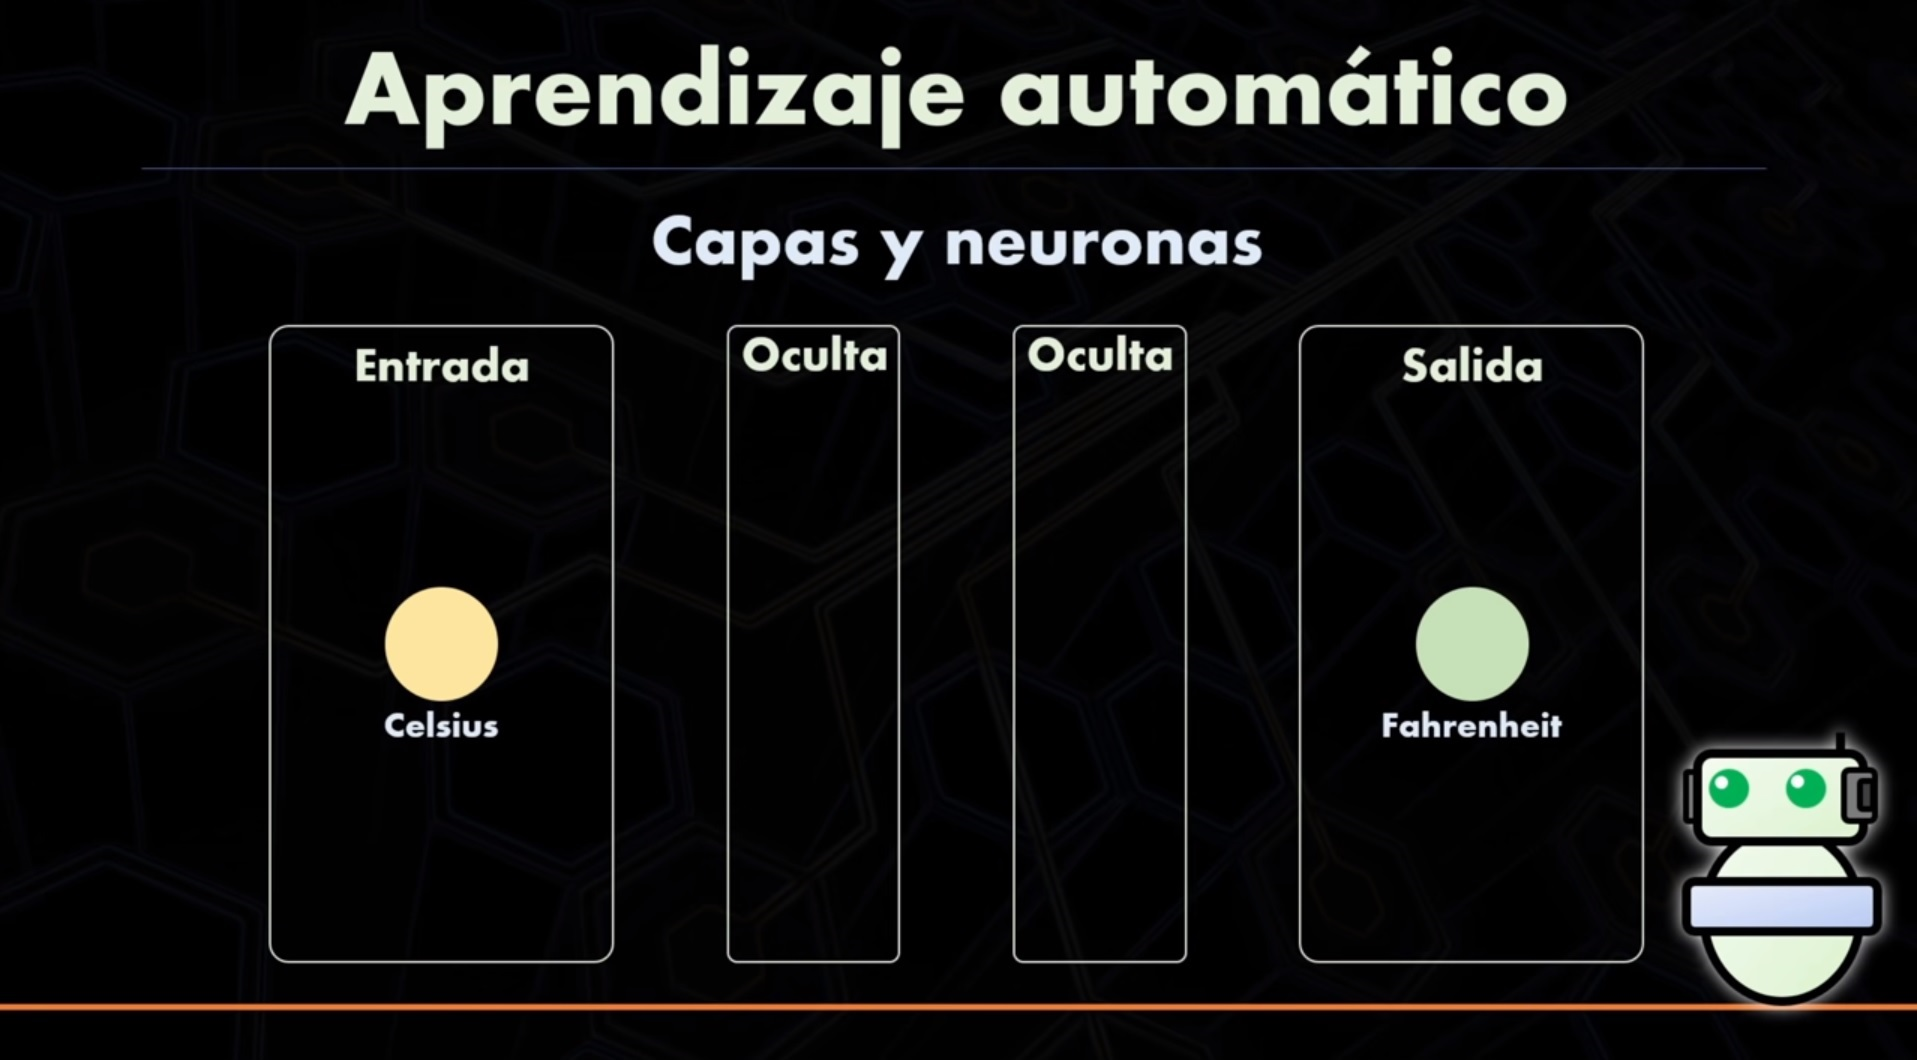

Para comenzar con el notebook evidentemente primero vamos a tener que importar tanto Tensorflow como Numpy y Matplotlib.El primero es para usar las funcionalidades de las redes neuronales, el segundo nos ayuda en la manipulacion de listas (arrays) y el ultimo en la confeccion de graficos.

In [1]:
import tensorflow as tf #para la red neuronal
import numpy as np # para los arreglos numericos
import matplotlib.pyplot as plt # para graficar perdidas en el entrenamiento

## Funcionamiento de la red neuronal
A grandes rasgos, la primer neurona tendra el valor inicial dado por nosotros, este valor se multiplicara por el peso asignado (de la conexion con la neurona de la siguiente capa) y se le sumara el "sesgo" de la neurona con la que conecta en la siguiente capa.
El valor inicial tanto del peso asignado como el del sesgo se asigna de manera aleatoria.
Para tener en cuenta:
 * Pesos = Weight
 * Sesgos = Biases

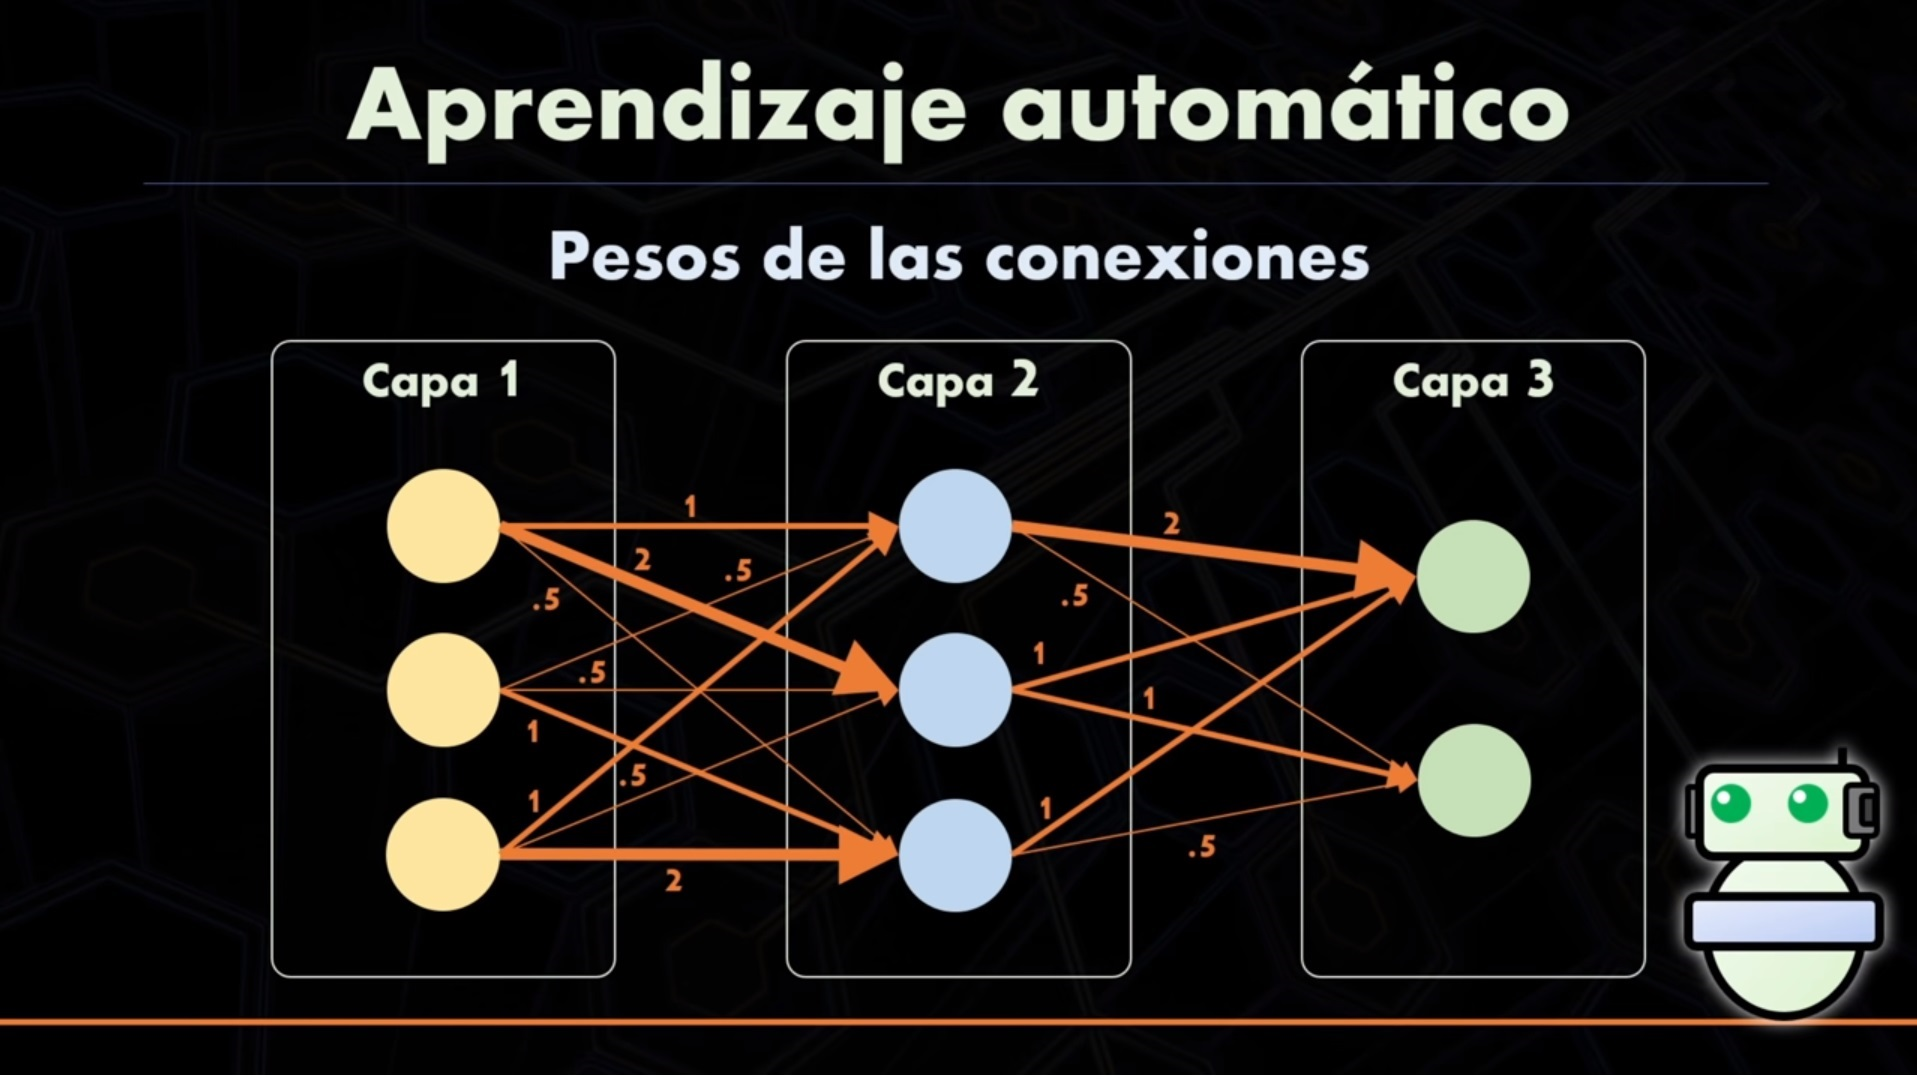

En el siguiente caso se mostrara una conexion de una nuerona con otra, de una capa a otra en la que la primera tiene un valor de entrada de 15, un peso de 1.8 y el valor del sesgo en la siguiente neurona es de 4.5.

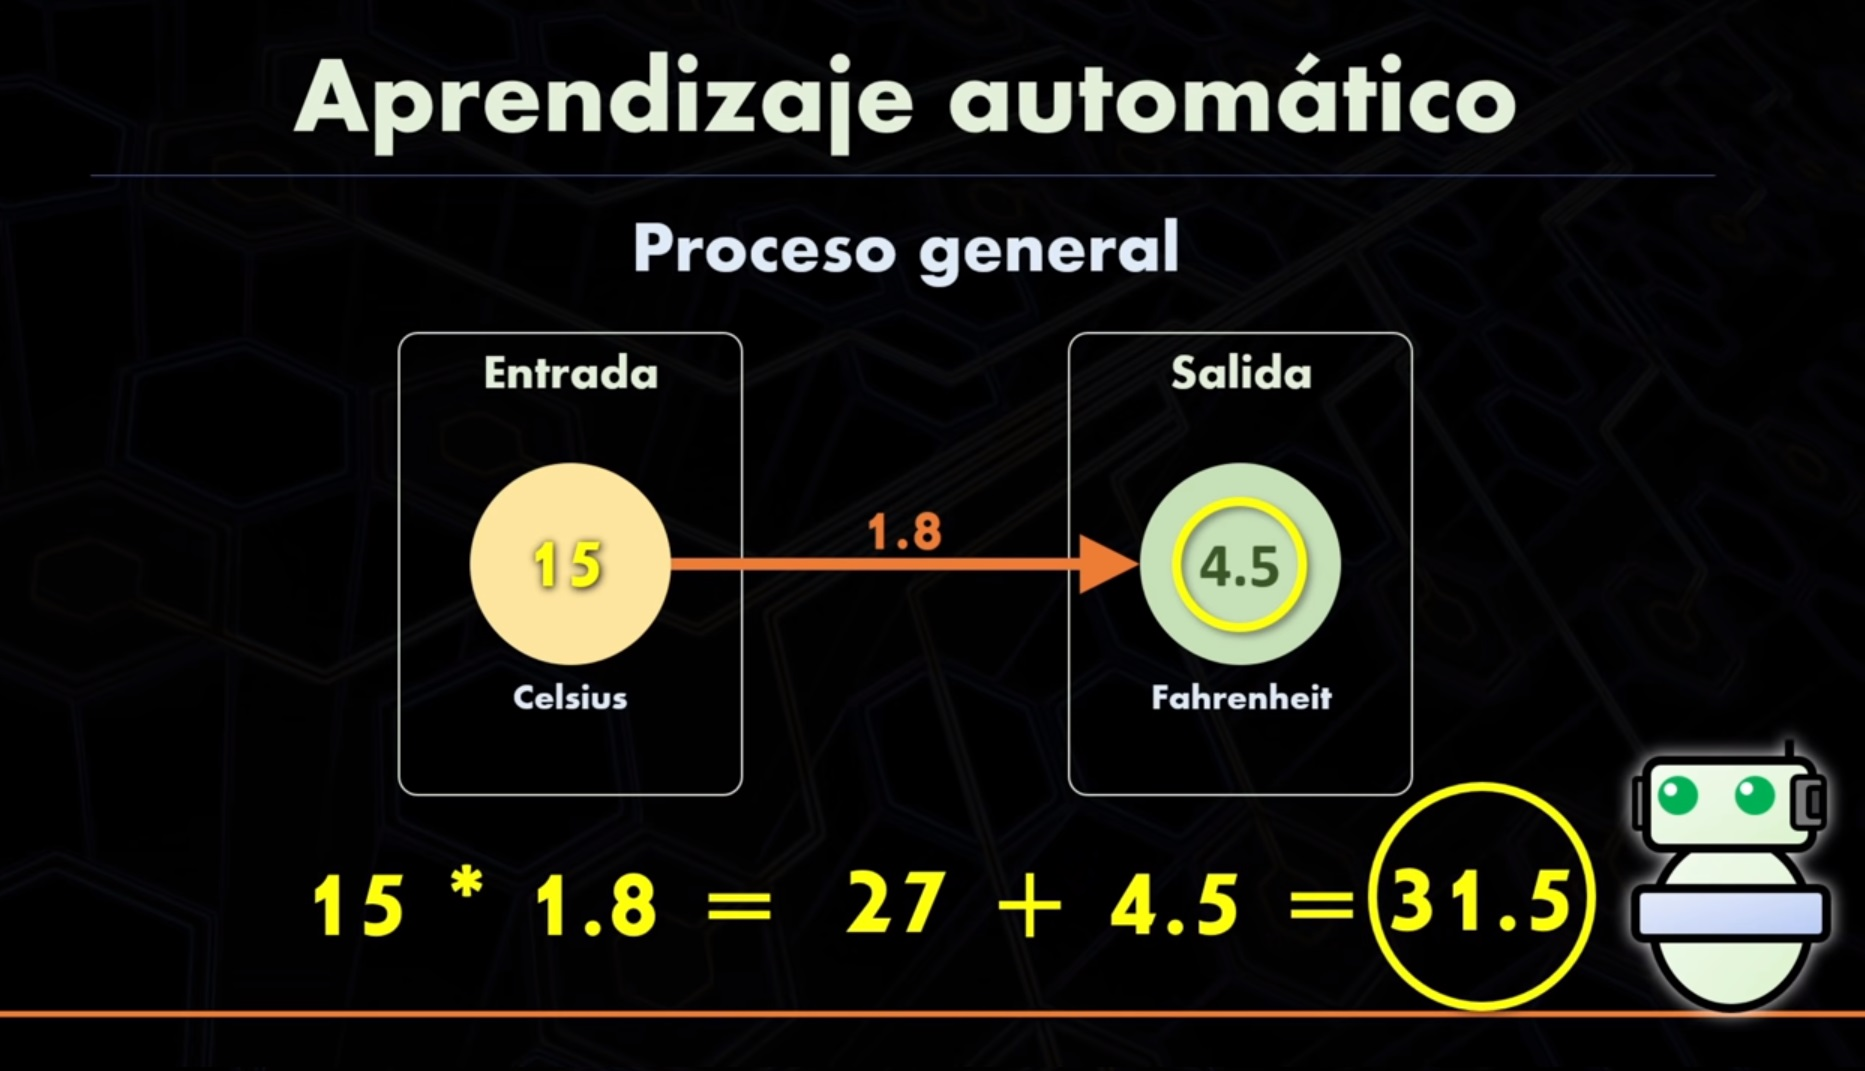

### Indicando valores de grados celsius y de grados farenheit para que la red tome de ejemplo

In [2]:
celsius = np.array([-40,-10,0,8,15,22,38], dtype=float) # valores iniciales
farenheit = np.array([-40,14,32,46,59,72,100], dtype=float) # valores finales

### CREACION DEL MODELO:
Usaremos keras para simplificar el proceso de definicion de capas de entrada y de salida

In [3]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

# Dense: hace refencia a una capa de muchas conexiones.
# units: unidades o neuronas de la capa
# imput_shape: inidicamos que tenemos una entrada con una neurona
# Sequential: modelo para red neuronal simple

### COMPILACION DEL MODELO
Este paso prepara el modelo para ser entrenado.

In [4]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

# Optimizador Adam: ayuda a optimizar el modelo para que vaya aprendiendo y mejorando
# 0.1 es la tasa de aprendizaje, el numero de ajuste que debe ir corrigiendo (ajusta pesos y sesgos)
# Loss: es la funcion de perdida, en este caso "mean_squared_error"

### COMENZANDO EL ENTRENAMIENTO

In [5]:
print("...comenzando el entrenamiento...")
historial = modelo.fit(celsius, farenheit, epochs = 750, verbose = False)
print("...Fin del entrenamiento!...")

# se pasa tanto el valor de entrada como el de salida para el entrenamiento
# epochs: es la cantidad de vueltas que le hago realizar el entrenamiento
# Verbose: es lo que se imprime mientras entrena, el valor False es para que no escriba en consola

...comenzando el entrenamiento...
...Fin del entrenamiento!...


### VER LOS RESULTADOS DE LA FUNCION DE PERDIDA
Nos dice que tan mal esta el resultado en cada vuelta que dio....

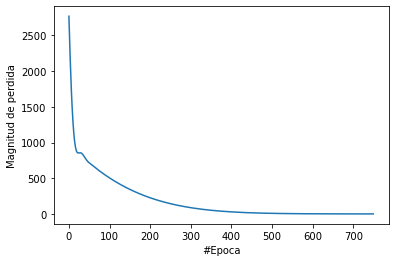

In [6]:
# graficando
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

# El grafico nos muestras que a partir de 350-400 ya dejo de aprender algo nuevo

### HACIENDO UNA PREDICCION!!!

In [7]:
print("HAGAMOS UNA PREDICCION!")
grados = float(input('Ingrese cantidad de grados a convertir: '))
resultado = modelo.predict([grados])
print("El resultado es "+ str(resultado) + "Farenheit!")

HAGAMOS UNA PREDICCION!
Ingrese cantidad de grados a convertir: 100
El resultado es [[211.69089]]Farenheit!


De lo anterior, bastante cerca ya que 100 celsius son 211 farenheit. Averiguando que valores tomo el modelo,vamos a saber que valores tomo como peso y como sesgo para el modelo

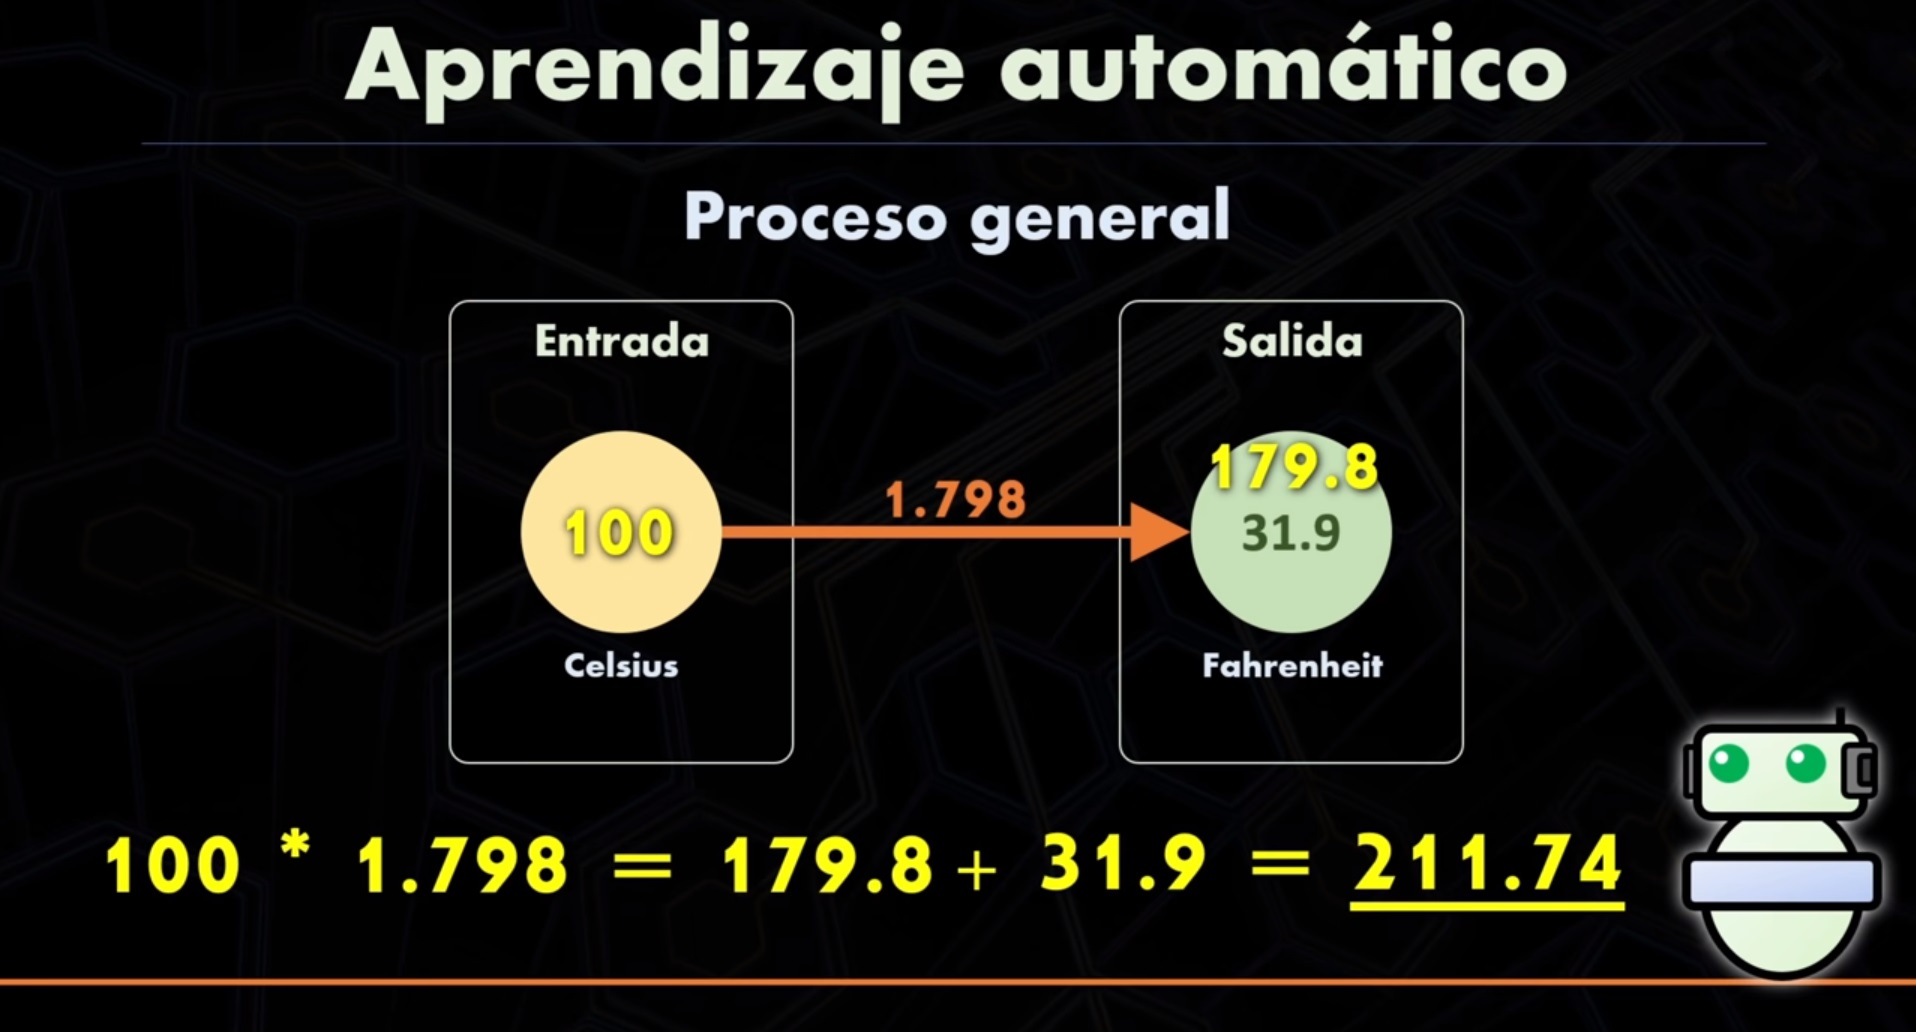

In [8]:
print("Variables internas del modelo")
print(capa.get_weights())

Variables internas del modelo
[array([[1.8012214]], dtype=float32), array([31.568748], dtype=float32)]


Se ve que tomo como peso a 1.80 y como sesgo a 31.56, son valores muy cercanos para la prediccion de celsius a farenheit
Bastante bien por ahora, pero que pasaria si agrego mas capas?

* nota: no olvidar de comentar el entrenamiento para poder aplicar ahora las capas.

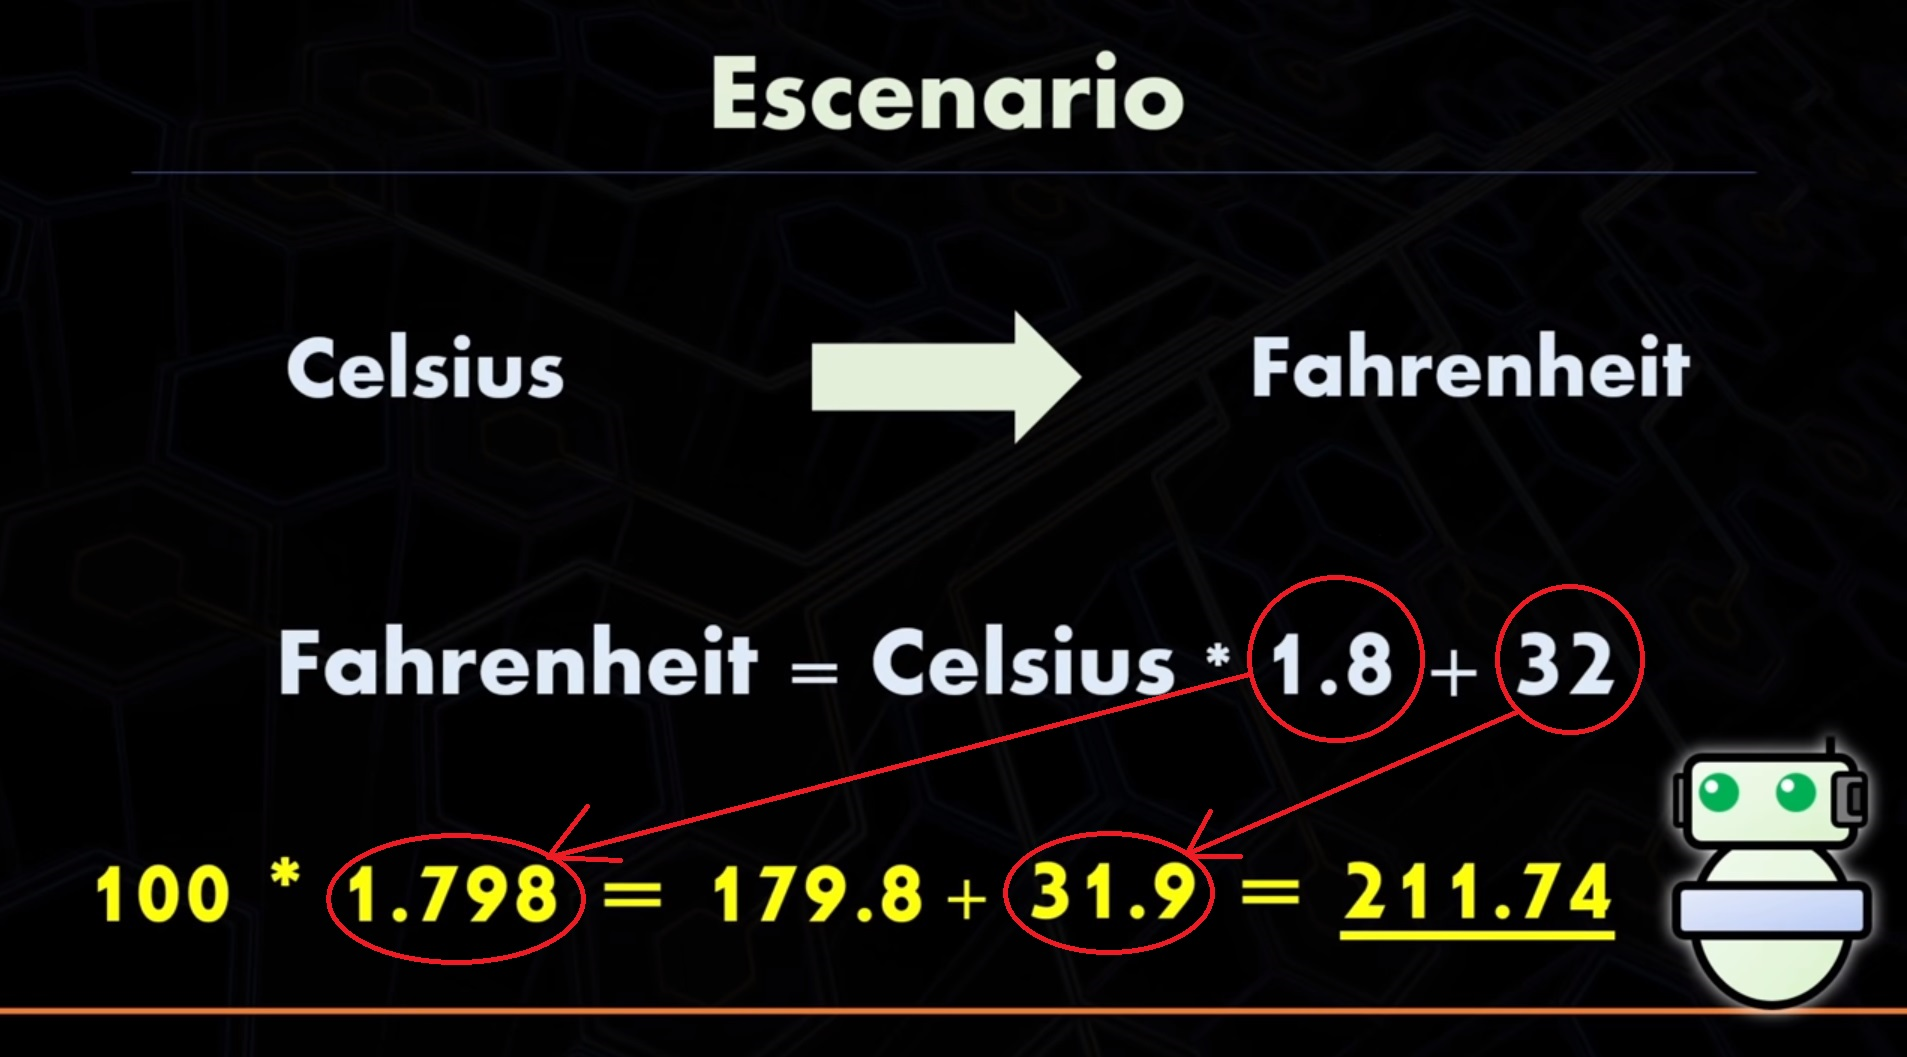

### Agregando 2 capas y 3 nueronas mas 

In [9]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

# compilando nuevamente el modelo

modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

Ahora....a entrenar! tardara mas porque tiene mas capas y mas neuronas...

In [10]:
print("...comenzando el entrenamiento...")
historial = modelo.fit(celsius, farenheit, epochs = 750, verbose = False)
print("...Fin del entrenamiento!...")

...comenzando el entrenamiento...
...Fin del entrenamiento!...


### Graficando nuevamente la funcion de perdida

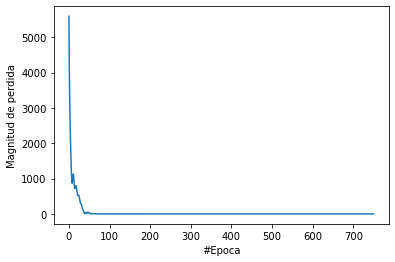

In [11]:
# graficando
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

# nos muestra que esta vez alcanza los resultados mucho antes, mas o menos a la vuelta 50

### Prediccion final con la nueva red!

In [12]:
print("HAGAMOS UNA PREDICCION!")
grados = float(input('Ingrese cantidad de grados a convertir: '))
resultado = modelo.predict([grados])
print("El resultado es "+ str(resultado) + "Farenheit!")

HAGAMOS UNA PREDICCION!
Ingrese cantidad de grados a convertir: 100
El resultado es [[211.74745]]Farenheit!


El resultado es practicamente el mismo....pero y los pesos y sesgos?

In [13]:
print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.5423544 , -1.0924762 , -0.41184828]], dtype=float32), array([ 1.8238924, -3.7678876,  2.6656873], dtype=float32)]
[array([[ 0.4489448 , -0.5284632 , -0.72601986],
       [-0.7330254 ,  0.47185814,  1.7013806 ],
       [ 0.62173957, -1.0056514 , -0.7759672 ]], dtype=float32), array([ 1.6061159, -1.4539421, -4.339976 ], dtype=float32)]
[array([[ 0.09012032],
       [-0.62402445],
       [-1.6469933 ]], dtype=float32), array([3.7507932], dtype=float32)]


Opinion final, se puede llegar por otro medio a los mismos resultados, siendo una red normal o una con varias capas y neuronas.